# Fonctions de hachage cryptographiques

Une [fonction de hachage cryptographique](https://en.wikipedia.org/wiki/Cryptographic_hash_function)
$H$ est un algorithme déterministe qui prend en entrée une chaîne (binaire) 
de longueur arbitraire $x$ et renvoie une chaîne de longueur fixe (le hachage, ou hash, $h=H(x)$), typiquement, 128, 160, 256 ou 512 bits.

Les plus courantes sont [md5](https://fr.wikipedia.org/wiki/MD5) 
et [SHA-1](https://fr.wikipedia.org/wiki/SHA-1), 
mais elles sont a présent considérées comme peu sûres et leur usage est déconseillé. On leur préfère la famille [sha2](https://fr.wikipedia.org/wiki/SHA-2).


In [1]:
!md5sum gsm.pdf
!sha1sum gsm.pdf
!sha256sum gsm.pdf
!sha512sum gsm.pdf

06314753aedc78f64c382f4c83cc15a6  gsm.pdf
b0c8493e0c6b6e5e08d870a1b318401236e07e82  gsm.pdf
7a798cff10cb5e2fdaf4d7d3b2876afff842ad137ffa593651329d10098b97e6  gsm.pdf
8a35d45119517fa8bed8236721d989b7058cae3258975e9e3f327ca73b14d7507f90e152bed3de4cffff9359d55a7cd68799699c4959cffef6f3a85e9971c66c  gsm.pdf


Une fonction de hachage cryptographique doit posséder les propriétés suivantes. Elle doit être facile (rapide) à calculer, et

- Il doit être difficile (idéalement, impossible), étant donné $h$, de trouver $x$ tel que $H(x)= h $(résistance à la préimage)

- Il doit être difficile, étant donnés $x$ et $h$, de trouver $y$ tel que $H(y) =h$ (résistance à la seconde préimage)

- Il doit être difficile de trouver $x$ et $y$ tels que $H(x)=H(y)$ (résistance aux collisions).



La résistance aux collisions est la plus difficile à assurer, elle demande une longueur de hachage double de celle des autres propriétés.

Parmi les applications, on peut citer :

- les signatures numériques

- les codes d'authentification de messages

- d'autres formes d'authentification (réseaux GSM, cartes bancaires …)

- les empreintes numériques (permettent de détecter un fichier sans examiner son contenu)

- le stockage des mots de passe

- la vérification de l'intégrité des données (par exemple après téléchargement d'une image iso)

- l'utilisation comme fonction de hachage ordinaire (attribuer un identifiant unique à un objet quelconque)

On demande donc aussi généralement que chaque bit de la sortie dépende de chaque bit de l'entrée, de sorte que toute modification de l'entrée ait un effet important sur la sortie (effet d'avalanche). Exemple en Python (x et y différent sur un seul bit) :




In [1]:
from hashlib import md5 # en Python 3 l'argument doit être de type bytes
x = b"Le cheval de mon cousin ne mange du foin que le dimanche"
y = b"Le cheval de mon cousin ne mange du foin que le Dimanche"
print (md5(x).hexdigest())
print (md5(y).hexdigest())

2d50214ce4a887f91811d1bee7912086
5e6002cb7cb5256b22b8b5eaef95e691


Pourquoi utilise t-on des hachages d'au moins 128 bits ? 

Supposons qu'on utilise un hachage de 64 bits pour authentifier un fichier texte (un contrat, par exemple). 

Un schéma courant de signature numérique est le suivant : le signataire chiffre le hachage avec sa clé privée RSA . 

Ainsi, tout le monde peut vérifier la signature avec sa clé publique (voir cours suivant). 

Un partenaire malhonnête peut contrefaire le contrat en calculant les hachages d'un contrat différent 
auquel il ajoute aléatoirement des détails invisibles (par exemple si le contrat comporte au moins 32 lignes, 
il peut choisir d'ajouter ou non un espace dans chacune des lignes, 
obtenant ainsi $2^{32}$ valeurs de hachages différentes pour des documents 
essentiellement identiques). 

Il procède de même avec le contrat qu'il veut 
faire signer à sa victime. Le paradoxe des anniversaires montre qu'il a de fortes chances d'avoir deux hachages identiques dans ses deux 
listes de taille $2^{32} = 4 294 967 296$, soit en ayant calculé moins de 10 milliards de hachages, 
ce qui est loin d'être inaccessible.

## Le paradoxe des anniversaires

Calculons la probabilité $p$ pour que dans un groupe de $n$ personnes, deux au moins aient leur anniversaire le même jour.
Il y a $N=365$ jours dans l'année (on négligera les années bissextiles !).

Numérotons ces personnes de 1 à n. Leurs dates d'anniversaire forment un $n$-uplet $(d_1,\ldots,d_n)\in\{1,\ldots,N\}^n$,
il y a donc $N^n$ possibilités. Parmi celles-ci, seulement
$$N(N-1)(N-2)\cdots (N-n+1)$$
ne contiennent pas deux dates identiques. 
La probabilité qu'elles soient toutes différentes est ainsi
$$p=\left(1-\frac1N\right)\left(1-\frac2N\right)\cdots\left(1-\frac{n-1}N\right)$$

La probabilité qu'au moind seux soient identiques est donc
$$
q = 1-p =1- \left(1-\frac1N\right)\left(1-\frac2N\right)\cdots\left(1-\frac{n-1}N\right)
$$

In [2]:
from functools import reduce
def p(n,N):
    return 1-reduce(lambda x,y:x*y,[1-float(i)/N for i in range(n)])

for n in range(15,25): print (n, p(n,365))

15 0.25290131976368646
16 0.28360400525285
17 0.31500766529656077
18 0.3469114178717895
19 0.37911852603153684
20 0.41143838358058016
21 0.4436883351652059
22 0.4756953076625502
23 0.5072972343239854
24 0.5383442579145288


On voit donc que pour $n\ge 23$, la probabilité est supérieure à $0.5$. 
Le graphique suivant montre qu'elle tend très vite vers 1.

In [3]:
pp = [p(n,365) for n in range(1,365)]

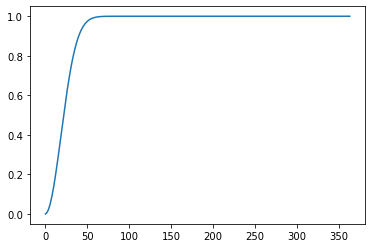

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(pp)

Si on suppose que $n<<N$, on peut utiliser l'approximation $e^{-x}\simeq 1-x$ et écrire
$$ p(n,N) \simeq 1 - \exp\left(\frac{n(n-1)}{2N}\right)\simeq 1 - \exp\left(\frac{n^2}{2N}\right). $$
                                                                            
On aura $p>0.5$ pour $n>\sqrt{2\ln 2 }\sqrt{N}$.

In [5]:
from math import log, sqrt
float(sqrt(2*log(2)))

1.1774100225154747

In [6]:
float(1.1774*sqrt(365))

22.49419541570669

Cette approximation nous redonne bien $p>0.5$ pour $n\ge 23$, et nous prédit, pour une fonction de hachage à valeurs
dans $\{0,1\}^m$, une probabilité de trouver une collision supérieure à $\frac12$ avec $1.177\cdot 2^{m/2}$ essais.
Pour des hachages de 64 bits, on trouvera donc en moyenne une collision après

In [8]:
1.177*2**32

5055176507.392

soit un peu plus de 5 milliards d'essais, ce qui est très faisable avec les machines modernes.

## Conception des fonctions de hachage

### Une fonction de hachage "idéale" : le modèle de l'[oracle aléatoire](https://en.wikipedia.org/wiki/Random_oracle)

On imagine un oracle à qui on peut demander des hachages de $m$ bits. Quand on lui fournit une chaîne de caractères, il consulte
son registre pour voir s'il l'a déjà rencontrée. Si oui, il renvoie le hachage consigné dans le registre. Sinon, il tire
à pile ou face les $m$ bits demandés, et enregistre le résultat.

C'est évidemment impraticable, mais on essaie de concevoir des fonctions de hachage qui soient aussi peu distinguables
que possible de ce modèle.

De nombreux protocoles cryptographiques sont prouvés sûrs dans ce modèle. En pratique, on espère que les fonctions
de hachage utilisées sont suffisamment aléatoires.

### Construction de Merkle-Damgård

Elle dépend du choix d'une [fonction de compression](https://en.wikipedia.org/wiki/One-way_compression_function)
à sens unique
$$
f:\ \{0,1\}^c\times \{0,1\}^b\longrightarrow \{0,1\}^c
$$
où $b$ est la taille des blocs (par exemple 512 bits), $c$ la variable de chaînage (par exemple 512 bits), qui doit être
supérieure à la taille $d$ de la sortie (de préférence, $c\ge 2d$).

La fonction $f$ doit présenter toutes les proprétés de résistance (collisions, préimage, etc.) demandées à $H$.

On choisit un vecteur d'initialisation (IV) $c_0$ (public) de $c$ bits. On concatène à la chaîne $x$ à hacher un
bit $1$ suivi d'un certain nombre de $0$ et de la longueur de $x$ codée sur un nombre fixé de bits, de manière
à ce que la longueur totale soit multiple de $b$. Si $m=m_1||m_2||\cdots||m_n$ est la chaîne résultante,
on calcule 
$$ c_k = f(c_{k-1},m_k),\ k=1\ldots n$$
et $H(x)$ est $c_n$ tronqué à $d$ bits.

Une technique courante consiste à partir d'un chiffrement par blocs avec une clef de $b$ bits et une taille de
blocs de $c$ bits, et à définir $f$ par
$$f(c_{i-1},m_i) = c_{i-1}\oplus E(m_i,c_{i-1})$$
où $E(k,m)$ est la fonction de chiffrement 
(construction de [Davies-Meyer](https://en.wikipedia.org/wiki/One-way_compression_function#Davies.E2.80.93Meyer).)

## Applications

### Stockage des mots de passe
On enregistre $H(w)$, ou plutôt $H(s|| w)$ ($s=$ sel). Si le mot de passe $w$ est suffisamment long et ne figure 
pas dans un dictionnaire de mots de passe, on ne doit pas pouvoir le retrouver. Il faut aussi que $H$ soit résistante aux collisions.

### Vérification de l'intégrité d'un fichier
$H(f)$ doit permettre de détecter toute modification. Il faut que $H$ résiste à la seconde préimage.

### Signatures numériques
Utilise un chiffrement à clef publique. Pour signer un document $M$, on calcule $h=H(M)$ et on le chiffre avec la clef secrète :
    $s=E(K_S,h)$.
Pour authentifier la signature, on déchiffre avec la clef publique $h'=D(K_P,h)$, on recalcule $H(M)$ et
on le compare à $h'$. (demande la résistance aux collisions mais pas à la préimage).

### Prouver qu'on connaît une information sans la révéler
On veut prouver qu'on a résolu un problème à une date donnée (solution $x$) où mis une enchère $x$.
Idée : rendre publique une chaîne $C(x)$ qui ne révèle rien sur $x$ (enveloppe scellée numérique).
On publie $C(x)=H(r||x)$ où $r$ est choisi aléatoirement. Pour ouvrir l'enveloppe, on révèle $r$ et $x$.

### Authentification sur un réseau
Le client doit prouver au serveur qu'il connaît une clef secrète $k$.
Le serveur envoie au client une chaîne aléatoire $r$, le client lui renvoie $H(r||k)$.

### Exemple : Authentification sur les réseaux GSM
Les téléphones mobiles GSM communiquent avec des stations de base, reliées au réseau d'un opérateur. 
Chaque téléphone contient une carte à puce, la carte SIM (Subscriber Identification Module). 
La puce est un microcontrôleur assez puissant (beaucoup plus que celui d'une carte bancaire) capable 
d'effectuer des calculs cryptographiques complexes.

La carte SIM contient une clé secrète de 128 bits, notée Ki. 
Elle se trouve dans un zone de la carte où il est impossible de la lire. 
Cette clé est aussi connue du réseau de l'opérateur.

Quand un téléphone demande à être authentifié par une station de base, la station lui envoie un entier aléatoire de 128 bits. 
La carte calcule un hachage de 32 bits de cet entier combiné avec sa clé secrète (algorithme A3) 
et le renvoie à la station, qui effectue le même calcul de son côté. Si les résultats coïncident, 
le téléphone est authentifié, et le même algorithme est de nouveau utilisé de part et d'autre pour calculer une clé de 
64 bits (algorithme A8) qui servira à chiffrer la communication entre le mobile et la base. 
Les deux algorithmes sont implantés simultanément sous une forme appelée comp128.

Ces algorithmes n'étaient pas publics, ils ont été conçus par des sociétés privées 
d'une manière totalement opaque. Mais comme les constructeurs d'équipements GSM devaient y avoir accès, 
il ne faut pas s'étonner qu'une étude confidentielle décrivant une partie du code se soit un jour 
retrouvée sur un site de discussion dédié à la cryptographie. Il n'a pas fallu longtemps pour reconstituer 
le code complet par rétro-ingénierie, et pour découvrir une faille catastrophique.

On trouvera [ici](http://www-igm.univ-mlv.fr/~jyt/Crypto/3/GSM/index.html) une documentation détaillée.